Decision tree

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder


# Charger les données
data = pd.read_csv('finaldataa1.csv')

# Séparer features et target
X = data.drop(['segment_id', 'start_time', 'end_time', 'dominant_activity'], axis=1)
y = data['dominant_activity']

# Encoder les labels (convertir les activités en nombres)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Diviser les données
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Créer et entraîner le modèle
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Évaluer le modèle
y_pred = model.predict(X_test)

# Afficher les résultats
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy: 0.5874351086329552

Classification Report:
                         precision    recall  f1-score   support

          Bed_to_Toilet       0.90      0.42      0.58       398
                 Chores       0.46      0.67      0.55      6605
          Desk_Activity       0.85      0.30      0.44       404
     Dining_Rm_Activity       0.00      0.00      0.00      1101
               Eve_Meds       0.00      0.00      0.00        51
         Guest_Bathroom       0.00      0.00      0.00      1418
       Kitchen_Activity       0.81      0.66      0.73       866
             Leave_Home       0.74      0.03      0.05      1374
Master_Bedroom_Activity       0.00      0.00      0.00       345
               Meditate       0.00      0.00      0.00        23
           Morning_Meds       0.80      0.70      0.74       141
                   Read       0.00      0.00      0.00       129
                  Sleep       0.70      0.89      0.79      7242
               Watch_TV       0.39  

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42),
                          params,
                          cv=5)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

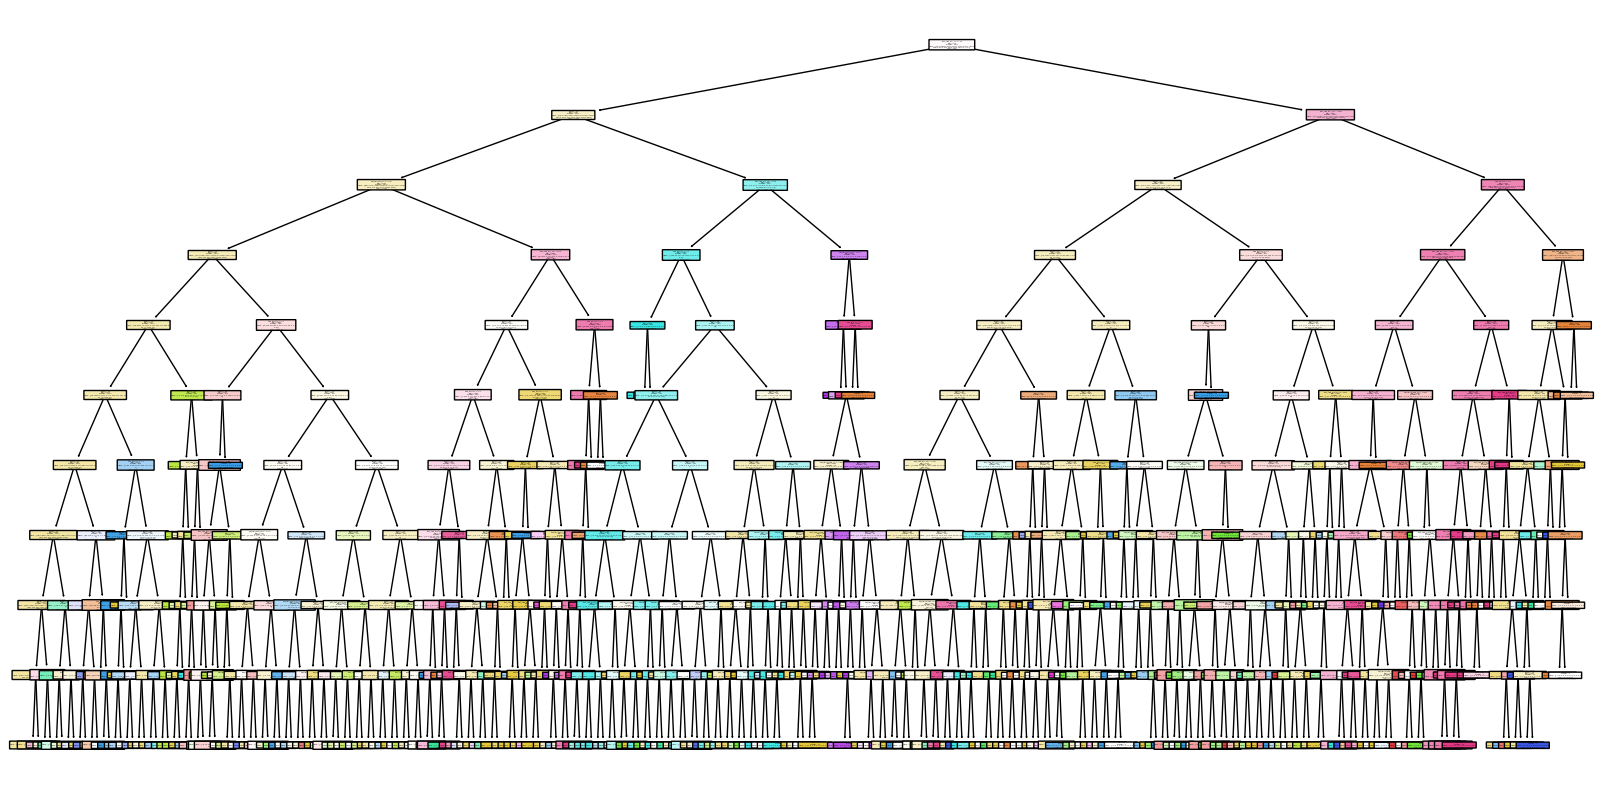

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(best_model,
          feature_names=X.columns,
          class_names=le.classes_,
          filled=True,
          rounded=True)
plt.show()

In [ ]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.5874351086329552


In [ ]:
f1 = f1_score(y_test, y_pred, average='macro')
print(f"F1-score (macro): {f1:.3f}")

F1-score (macro): 0.306


In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 169  176    0    0    0    0    2    0    0    0    0    0   48    3]
 [   7 4448   18    0    0    0   67    8    0    0   14    0 2005   38]
 [   1  155  121    0    0    0    6    0    0    0    0    0    7  114]
 [   2  855    1    0    0    0   20    3    0    0    2    0   28  190]
 [   0   46    0    0    0    0    0    0    0    0    0    0    0    5]
 [   0  842    0    0    0    0   17    1    0    0    4    0  543   11]
 [   0  286    0    0    0    0  570    1    0    0    1    0    3    5]
 [   1 1191    1    0    0    0   12   37    0    0    1    0   29  102]
 [   6  278    1    0    0    0    2    0    0    0    0    0   54    4]
 [   0   21    0    0    0    0    1    0    0    0    0    0    1    0]
 [   1   32    0    0    0    0    0    0    0    0   98    0   10    0]
 [   0  125    0    0    0    0    0    0    0    0    0    0    3    1]
 [   0  767    0    0    0    0    0    0    0    0    0    0 6475    0]
 [   0  372    0    0    0    0    3    0    0    0